## 2.曽呂利新左衛門問題

「Pythonを使ってみよう」の問題で扱った紙を折ると月に届く話に似たものとして、曽呂利新左衛門の逸話があります。これを題材にプログラミングを進めます。

>秀吉から褒美を下される際、何を希望するか尋ねられた新左衛門は、今日は米1粒、翌日には倍の2粒、その翌日には更に倍の4粒と、日ごとに倍の量の米>を100日間もらう事を希望した。米粒なら大した事はないと思った秀吉は簡単に承諾したが、日ごとに倍ずつ増やして行くと100日後には膨大な量になる>事に途中で気づき、他の褒美に変えてもらった。


## 【問題1】100日目の米粒の数

100日目には合計で米粒をいくつもらっているのかを計算するコードを作成し、答えを出力してください。また、1日目から100日目までの「その日にもらう米の数」と「その日までに累計で貰う米の数」の推移を折れ線グラフで表現してください。（縦軸が米の数、横軸が日数）

In [1]:
DAYS = 100     # 計算する日数（N日後）
FIRST_DAY = 1  # １日目の米の数

rice_day_count_list = [FIRST_DAY]   # その日にもらう米の数
rice_ruikei_list = [rice_day_count_list[-1]]      # その日までに累計でもらう米の数

for i in range(DAYS):
    rice_day_count_list.append(rice_day_count_list[-1] * 2)
    rice_ruikei_list.append(rice_ruikei_list[-1] + rice_day_count_list[-1])

    # デバッグ用
    #print('その日にもらう米の数\r\n{}'.format(rice_day_count_list))
    #print('その日までに累計でもらう米の数\r\n{}'.format(rice_ruikei_list))
pass

# N日目の米粒の数表示
print('{}日目の米粒の数：{:,}'.format(DAYS, rice_day_count_list[-1]))
print('{}日目の米粒の数(累計)：{:,}'.format(DAYS, rice_ruikei_list[-1]))

100日目の米粒の数：1,267,650,600,228,229,401,496,703,205,376
100日目の米粒の数(累計)：2,535,301,200,456,458,802,993,406,410,751


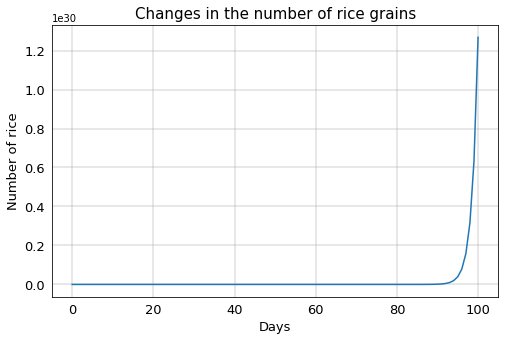

In [2]:
# グラフ化
import matplotlib.pyplot as plt
%matplotlib inline

# N日後にもらえる米の数の推移を表示
plt.figure(figsize=(8, 5))
plt.title("Changes in the number of rice grains", fontsize=15)
plt.xlabel("Days", fontsize=13)
plt.ylabel("Number of rice", fontsize=13)
plt.tick_params(labelsize=13, color='white')
plt.grid(True, linewidth=1.5, alpha=0.4)

plt.plot(rice_day_count_list)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

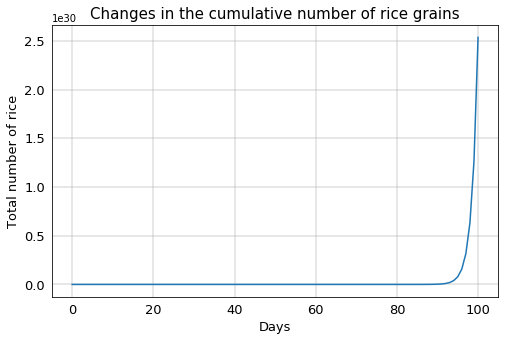

In [3]:
# N日後にもらえる累計の米の数の推移を表示
plt.figure(figsize=(8, 5))
plt.title("Changes in the cumulative number of rice grains", fontsize=15)
plt.xlabel("Days", fontsize=13)
plt.ylabel("Total number of rice", fontsize=13)
plt.tick_params(labelsize=13, color='white')
plt.grid(True, linewidth=1.5, alpha=0.4)

plt.plot(rice_ruikei_list)
plt.show

## 【問題2】100日目以外の米粒の数
この逸話は30日だったり81日だったりと日数が曖昧です。どの話にも対応できるように日数を引数とした 関数 を作成しましょう。関数を作成した上で、コースを受講する日数の間でいくつ米粒をもらえるかを答えてください。前の問題同様に折れ線グラフも出力してください。

以下の雛形には関数としての枠組みだけではなく、引数や返り値についてのコメントも記載してあります。参考にして、自分なりにも分かりやすくコメントを書き換えてください。

In [4]:
def compute_sorori_shinzaemon(day=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。

    Parameteres
    --------------
    day: int
        米を貰う日数 (default : 100)

    Returns
    --------------
    list_n_grains : list
        ある日に貰う米の数のリスト（リストの長さはdayに等しくなる）
    list_total_grains : list
        ある日までに累計で貰う米の数のリスト（リストの長さはdayに等しくなる）
    """

    FIRST_DAY = 1  # １日目の米の数
    list_n_grains = [FIRST_DAY]   # day経過後にもらう米の数
    list_total_grains = [list_n_grains[-1]]      # day経過後にもらう米の数(累計)

    for i in range(day):
        list_n_grains.append(list_n_grains[-1] * 2)
        list_total_grains.append(list_total_grains[-1] + list_n_grains[-1])
    pass
    return list_n_grains, list_total_grains

list_n_grains, list_total_grains = compute_sorori_shinzaemon(day=10)
print(list_n_grains)
print(list_total_grains)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
[1, 3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047]


## 【問題3】何人が何日生活できる米か
この米があれば何人が何日生活できるか計算する関数を作成してください。コースを受講する期間に貰える米粒で、このクラスにいる人数であれば、何日間生活できるかを出力してみましょう。


関数の最低限の入力は 米粒の数(int) と 人数(int) 、出力は 生活できる日数(int) です。関数名やコメントなどは分かりやすく考えて作成してください。

ここでは1日に必要な米粒の数は提示しません。自分なりに調べて、計算式に落とし込んでください。どう調べ、何を根拠にしたかもコメントを残しておいてください。

In [5]:
"""
※一日に必要な米の量に関するメモ
・最低でも1日に100～150gの炭水化物が必要です。 ごはんに換算すると、ごはん茶碗約2杯です。
・茶椀1杯のお米の粒（約65g）を数えると、約3，250粒あります。
"""

NUM_MEMBER = 14   # 受講人数
COURSE_DAYS = 120 # コース受講日数

def survival_days(rice_count, num_member):
    """
    引数として受け取った米粒の量・人数から、最低何日間生活できるかを計算する関数

    Parameters
    ----------
    rice_count : int
        米粒の数
    num_member : int
        人数

    Returns
    -------
    days_to_live : int
        生活できる日数
    """

    ONE_CUP_RICE_NUM = 3250             # 茶碗一杯あたりの米粒数
    RICE_NEEDED = ONE_CUP_RICE_NUM * 2  # 一日に必要なご飯の量。最低でもご飯2杯必要
    print("一日に必要な米の量：{:,}粒".format(RICE_NEEDED))
    
    # 生活できる日数を計算
    days_to_live = rice_count // (RICE_NEEDED * num_member)
    return days_to_live


# 問題2の関数を利用して、ある期間(COURSE_DAYS)経過後にもらえる米の数を計算
rice_list, total_rice_list = compute_sorori_shinzaemon(COURSE_DAYS)
rice_count = rice_list[-1]
print("{:,}日後にもらえる米の量：{:,}粒".format(COURSE_DAYS, rice_count))

# 何人が何日生活できるかを表示
print("{:,}人が生活できる日数：{:,}日".format(NUM_MEMBER, survival_days(rice_count, NUM_MEMBER)))


120日後にもらえる米の量：1,329,227,995,784,915,872,903,807,060,280,344,576粒
一日に必要な米の量：6,500粒
14人が生活できる日数：14,606,901,052,581,493,108,833,044,618,465日
